# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration / Data Cleaning

**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Tableau and Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:

What methods are best for identifying outliers?
* You can use the `.describe()` function to identify the maximum and minimum values, which can indicate potential outliers when compared to the median and mean. Additionally, visual methods such as boxplots or histograms can be useful for spotting outliers.

How do you make the decision to keep or exclude outliers from any future models?
* If the outliers are few and clearly due to data entry errors, they can be safely removed. However, if there is uncertainty, it's best to investigate how the data was collected, as outliers can contain valuable predictive information. Instead of removing outliers, they can also be imputed with values closer to a reasonable range, such as the interquartile range multiplied by 1.5. Additionally, removing outliers can improve the performance of some machine learning models that are more sensitive to them, improving overall generalizability. Normality is also assumed in many statistical tests; therefore, outliers would violate these assumptions and lead to incorrect outcomes.



### **Task 1. Imports, links, and loading**
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps.

Link to supporting materials:
Public Tableau: https://public.tableau.com/s/. Note that the TikTok dataset can be downloaded directly from this notebook by going to "Lab Files" in the menu bar at the top of the page, clicking into the "/home/jovyan/work" folder, selecting `tiktok_dataset.csv`, and clicking "Download" above the list of files. 

For EDA of the data, import the packages that would be most helpful, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.


In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

### **Task 2a: Data exploration and cleaning**

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set.

Consider functions that help you understand and structure the data.

*    `.head()`
*    `.info()`
*    `.describe()`
*    `.groupby()`
*    `.sort_values()`

Consider the following questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

Start by discovering, using `.head()`, `.size`, and `.shape`.

In [3]:
# Display and examine the first few rows of the dataframe
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
data.size

232584

In [5]:
# Get the shape of the data
data.shape

(19382, 12)

Get basic information about the data, using `.info()`.

In [6]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [7]:
# Generate a table of descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 2b. Assess data types**

In Tableau, staying on the data source page, double check the data types of the columns in the dataset. Refer to the dimensions and measures in Tableau.


Review the instructions linked in the previous Activity document to create the required Tableau visualization.

### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


1. Box plots are useful for visualizing outliers, distributions, interquartile ranges, and median values.
2. Histograms are useful for visualizing the frequency distribution of variables.
3. Bar plots are useful for comparing multiple groups, such as active, banned, or under investigation statuses.
4. Scatter plots are useful for comparing different count variables, such as view counts vs. like counts.
5. Pie charts are useful for comparing proportions between two groups, such as opinions vs. claims.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

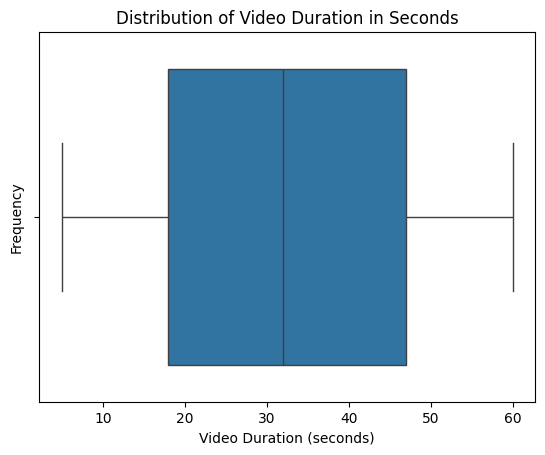

In [8]:
# Create a boxplot to visualize distribution of `video_duration_sec`
sns.boxplot(x=data['video_duration_sec'])
xlabel = plt.xlabel('Video Duration (seconds)')
ylabel = plt.ylabel('Frequency')
title = plt.title('Distribution of Video Duration in Seconds')

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

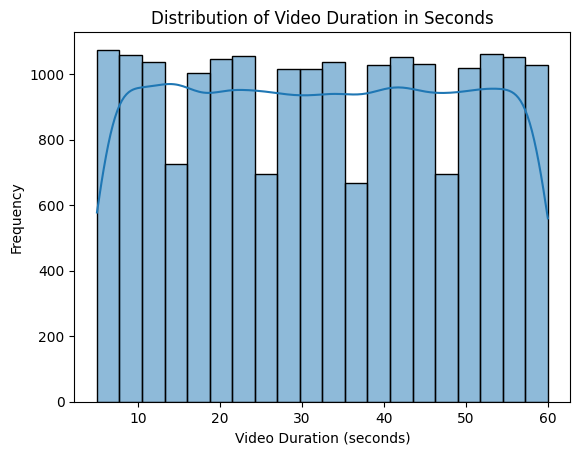

In [9]:
# Create a histogram
sns.histplot(data['video_duration_sec'], bins=20, kde=True)
xlabel = plt.xlabel('Video Duration (seconds)')
ylabel = plt.ylabel('Frequency')
title = plt.title('Distribution of Video Duration in Seconds')

**Question:** What do you notice about the duration and distribution of the videos?
* The distribution of video duration in seconds appears to be uniform.


#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

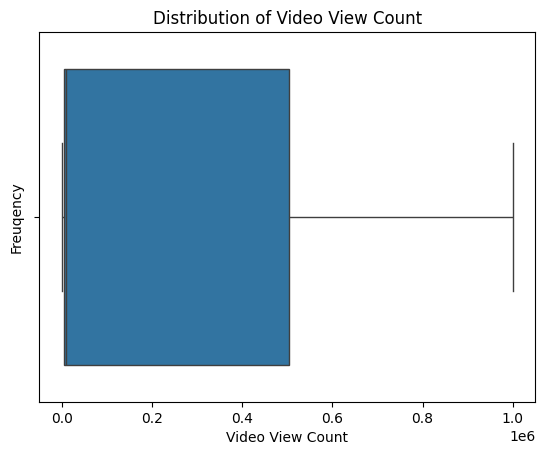

In [10]:
# Create a boxplot to visualize distribution of `video_view_count`
sns.boxplot(x = data['video_view_count'])
xlabel = plt.xlabel('Video View Count')
ylabel = plt.ylabel('Freuqency')
title = plt.title('Distribution of Video View Count')

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

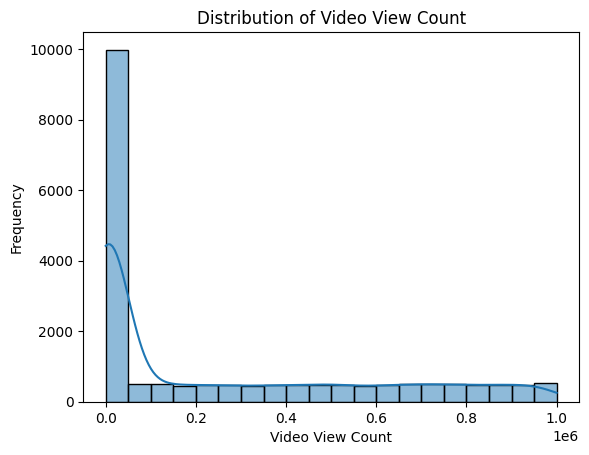

In [11]:
# Create a histogram
sns.histplot(data['video_view_count'], bins=20, kde=True)
xlabel = plt.xlabel('Video View Count')
ylabel = plt.ylabel('Frequency')
title = plt.title('Distribution of Video View Count')

**Question:** What do you notice about the distribution of this variable?
* The distribution is heavily right-skewed, indicating that most videos have a lower view count, with some significant outliers.

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

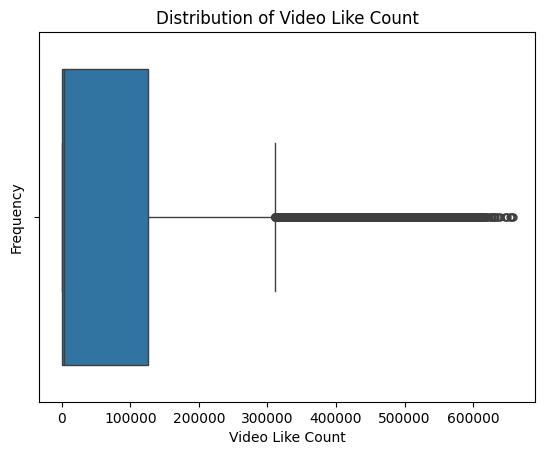

In [12]:
# Create a boxplot to visualize distribution of `video_like_count`
sns.boxplot(x = data['video_like_count'], flierprops=dict(marker='o', markersize=5))
xlabel = plt.xlabel('Video Like Count')
ylabel = plt.ylabel('Frequency')
title = plt.title('Distribution of Video Like Count')

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

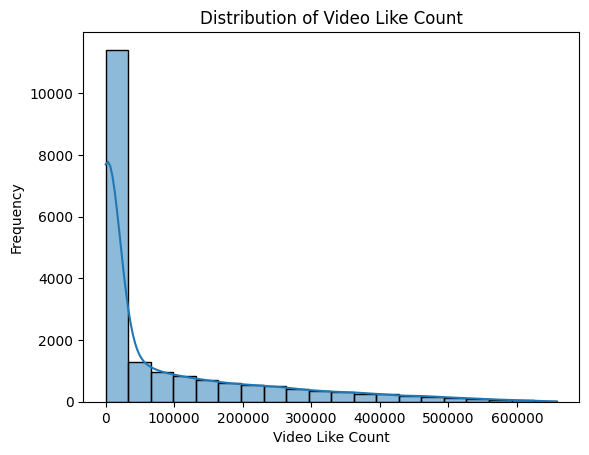

In [13]:
# Create a histogram
sns.histplot(data['video_like_count'], bins = 20, kde = True)
xlabel = plt.xlabel('Video Like Count')
ylabel = plt.ylabel('Frequency')
title = plt.title('Distribution of Video Like Count')

**Question:** What do you notice about the distribution of this variable?
* The distribution of this variable is also heavily right-skewed, with the majority of videos having approximately 25,000 likes with some significant outliers up to ~600,000.

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

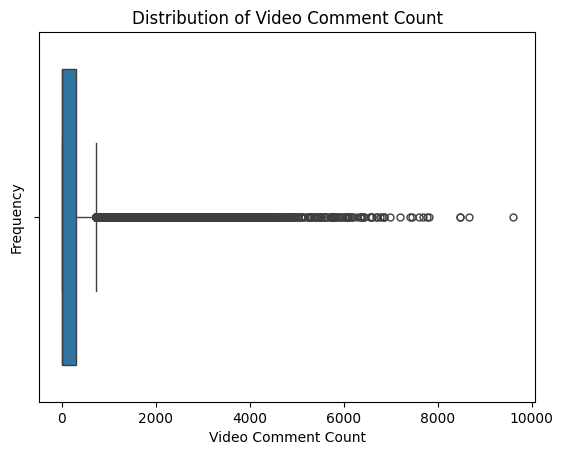

In [14]:
# Create a boxplot to visualize distribution of `video_comment_count`
sns.boxplot(x = data['video_comment_count'], flierprops=dict(marker='o', markersize=5))
xlabel = plt.xlabel('Video Comment Count')
ylabel = plt.ylabel('Frequency')
title = plt.title('Distribution of Video Comment Count')

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

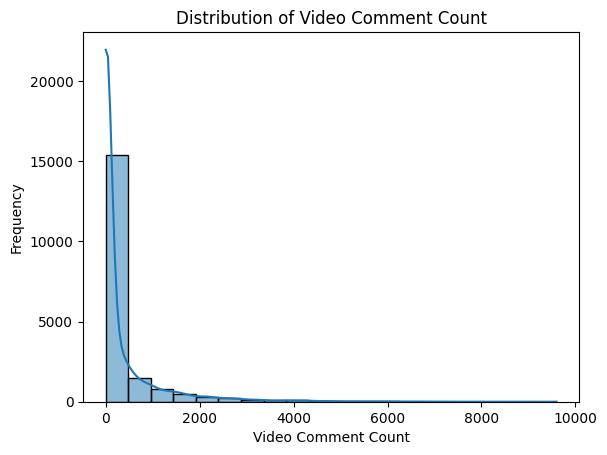

In [15]:
# Create a histogram
sns.histplot(data['video_comment_count'], bins = 20, kde = True)
xlabel = plt.xlabel('Video Comment Count')
ylabel = plt.ylabel('Frequency')
title = plt.title('Distribution of Video Comment Count')

**Question:** What do you notice about the distribution of this variable?
* The variable is heavily right-skewed, with the majority of videos having approximately 250 comments on average with some significant outliers up to ~9500.

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

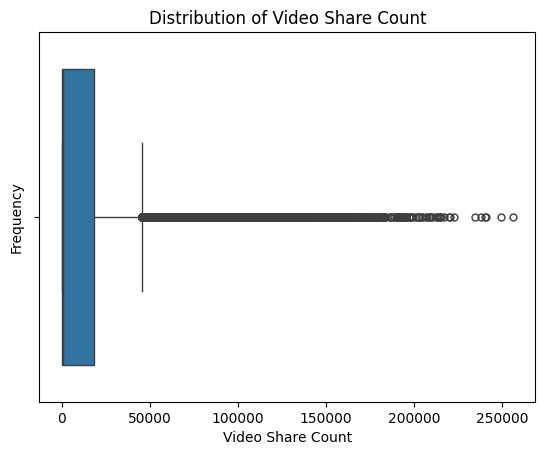

In [16]:
# Create a boxplot to visualize distribution of `video_share_count`
sns.boxplot(x = data['video_share_count'], flierprops=dict(marker='o', markersize=5))
xlabel = plt.xlabel('Video Share Count')
ylabel = plt.ylabel('Frequency')
title = plt.title('Distribution of Video Share Count')

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

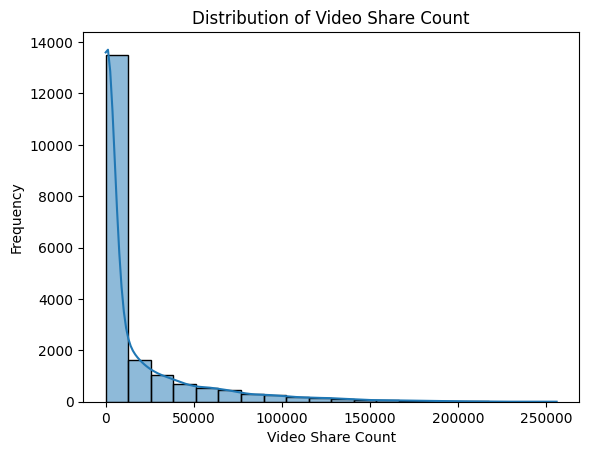

In [17]:
# Create a histogram
sns.histplot(data['video_share_count'], bins = 20, kde = True)
xlabel = plt.xlabel('Video Share Count')
ylabel = plt.ylabel('Frequency')
title = plt.title('Distribution of Video Share Count')

**Question:** What do you notice about the distribution of this variable?
* This variable is also heavily right-skewed, with the majority of videos being shared approximately 5000 times on average with some significant outliers up to ~275,000.

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

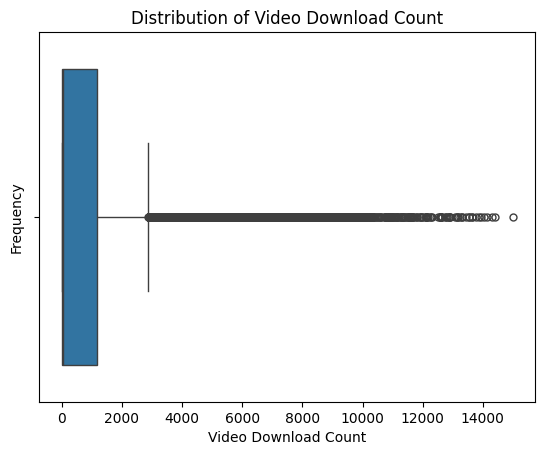

In [18]:
# Create a boxplot to visualize distribution of `video_download_count`
sns.boxplot(x = data['video_download_count'], flierprops=dict(marker='o',markersize=5))
xlabel = plt.xlabel('Video Download Count')
ylabel = plt.ylabel('Frequency')
title = plt.title('Distribution of Video Download Count')

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

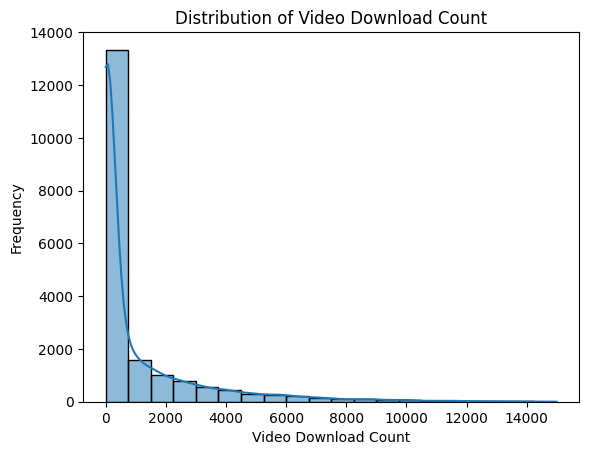

In [19]:
# Create a histogram
sns.histplot(data['video_download_count'], bins = 20, kde = True)
xlabel = plt.xlabel('Video Download Count')
ylabel = plt.ylabel('Frequency')
title = plt.title('Distribution of Video Download Count')

**Question:** What do you notice about the distribution of this variable?
* Another heavily right-skewed variable, indicating most videos are downloaded approximately 250 times, with some significant outliers up to ~15,000.

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

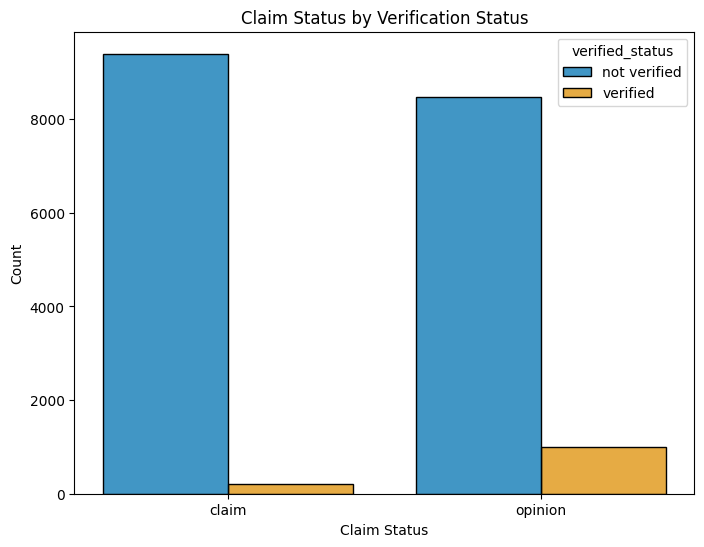

In [20]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='claim_status', hue='verified_status', multiple='dodge', shrink=0.8, palette='colorblind')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.title('Claim Status by Verification Status')
plt.show()

* There are significantly more videos from unverified users compared to verified users. It appears that verified users are more likely to post opinion videos than unverified users.

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

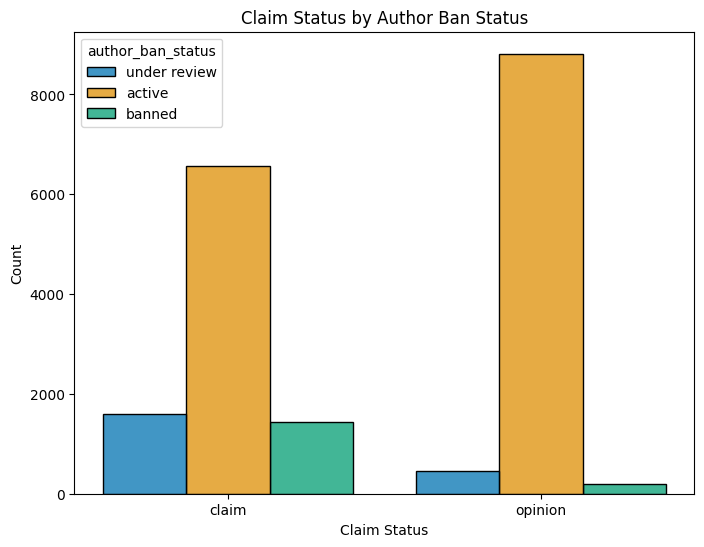

In [21]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x = 'claim_status', hue = 'author_ban_status', multiple = 'dodge', shrink = 0.8, palette = 'colorblind')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.title('Claim Status by Author Ban Status')
plt.show()

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?
* For claims, the proportion of banned users to active users is closer than for opinions, which may indicate that authors of claim videos are more likely to be banned than those of opinion videos.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

Text(0.5, 1.0, 'Author Ban Status by Video View Count')

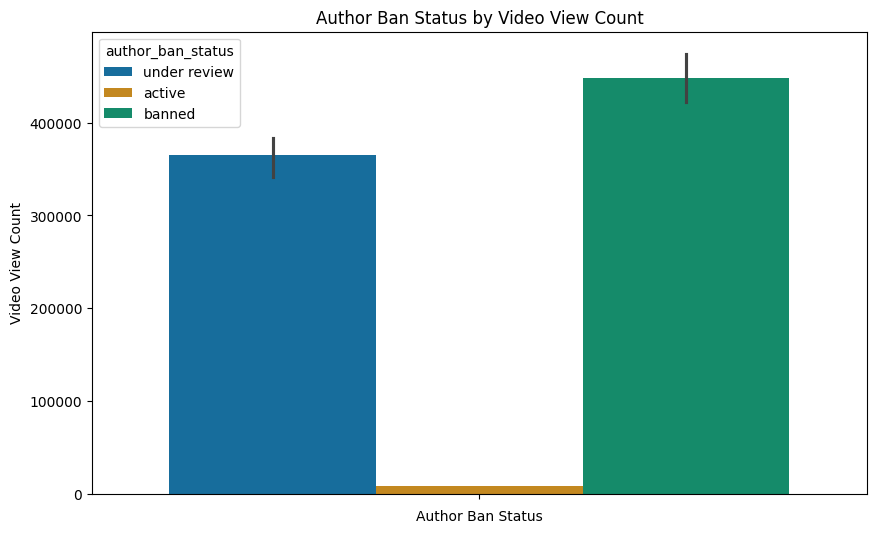

In [22]:
# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=data, hue='author_ban_status', y='video_view_count', estimator=np.median, palette='colorblind')
plt.xlabel('Author Ban Status')
plt.ylabel('Video View Count')
plt.title('Author Ban Status by Video View Count')

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?
* 'video_view_count' may be a good predictor of 'claim_status'. Non-active users have significantly higher video view counts compared to active users.

In [23]:
# Calculate the median view count for claim status.
median_view_count = data.groupby('claim_status')['video_view_count'].median()
print("Counts:\n",median_view_count)
print()
proportion = median_view_count / median_view_count.sum()
print("Proportions:\n",proportion)

Counts:
 claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

Proportions:
 claim_status
claim      0.990221
opinion    0.009779
Name: video_view_count, dtype: float64


#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

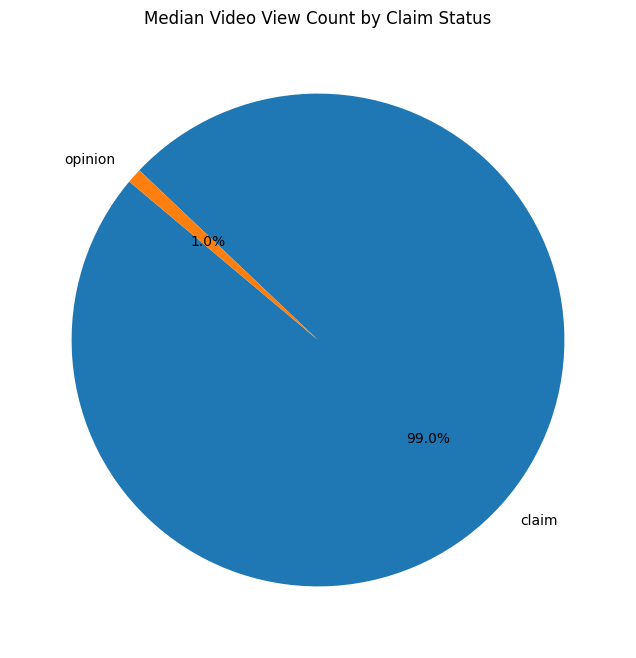

In [24]:
# Create a pie graph
plt.figure(figsize=(8,8))
plt.pie(median_view_count, labels=median_view_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Median Video View Count by Claim Status')
plt.show()

**Question:** What do you notice about the overall view count for claim status?
* The view count for videos categorized as claims is significantly higher, by an extreme amount, than for videos categorized as opinions.

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the number of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [25]:
def calc_IQR(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        col_median = df[col].median()
        outlier_threshold = col_median + 1.5 * IQR
        outlier_count = df[df[col] > outlier_threshold][col].count()
        print(f"Number of outliers - {col}: {outlier_count}")

columns_to_check = ['video_view_count', 'video_like_count', 'video_comment_count', 'video_share_count', 'video_download_count']
calc_IQR(data, columns_to_check)

Number of outliers - video_view_count: 2343
Number of outliers - video_like_count: 3468
Number of outliers - video_comment_count: 3882
Number of outliers - video_share_count: 3732
Number of outliers - video_download_count: 3733


#### **Scatterplot**

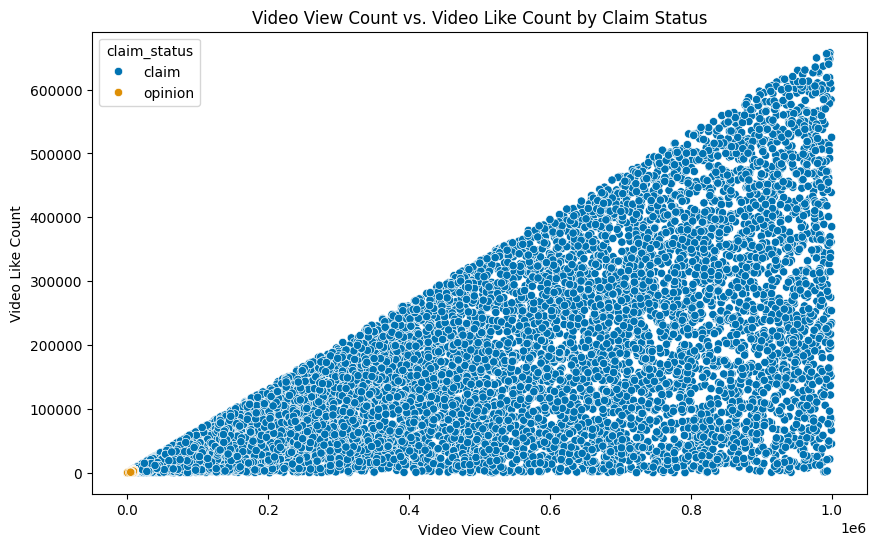

In [26]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='video_view_count', y='video_like_count', hue='claim_status', palette='colorblind')
plt.xlabel('Video View Count')
plt.ylabel('Video Like Count')
plt.title('Video View Count vs. Video Like Count by Claim Status')
plt.show()

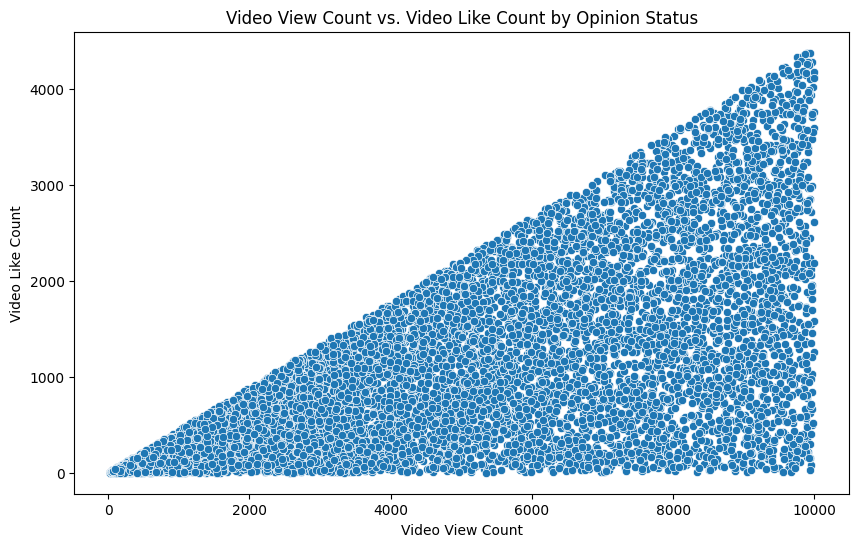

In [27]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
plt.figure(figsize=(10,6))
sns.scatterplot(data=data[data['claim_status'] == 'opinion'], x='video_view_count', y='video_like_count')
plt.xlabel('Video View Count')
plt.ylabel('Video Like Count')
plt.title('Video View Count vs. Video Like Count by Opinion Status')
plt.show()

You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the instructions linked in the previous Activity page.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

***Pro tip:*** Put yourself in your client's perspective, what would they want to know?

Use the following code cells to pursue any additional EDA. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


I have learned ....

* There are significantly more videos categorized as 'claim' vs 'opinion'.
* It appears the variable 'video_view_count' may be a good predictor of 'claim_status' based on how non-active users get far more views than active users.
* Many of the count variables are significantly right-skewed and not normally distributed.

My other questions are ....
* I would like to further investigate 'claims' and 'opinions' separately to identify more distinctive characteristics.
* Additionally, I'd like to explore the connection between videos from non-active authors and 'claim_status', particularly focusing on videos categorized as claims from banned users.

My client would likely want to know ...
* The client will want to know which variables are the most predictive of 'claim_status'.

### **Task 5b. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


EDA is important because ...

* EDA allows you to take a deep dive into the data to handle any missing or erroneous values, understand outliers and variable distributions, and discern any underlying trends, all of which will lead to model development preparation.

Visualizations helped me understand ...

* That understanding variable distributions and outliers will need to be completed before any model development takes place. Outliers can potentially have a detrimental impact on the predictive performance of a model.


You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.